<a href="https://colab.research.google.com/github/worldwidekatie/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
!pip install category_encoders
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
df_orig = pd.read_csv('https://raw.githubusercontent.com/worldwidekatie/Build_Week_2/master/Final_IRA.csv')

df = df_orig[['content',	'region',	'language',	'publish_date',	'harvested_date',	
             'following',	'followers',	'updates',	'post_type',	'account_type',	
             'new_june_2018',	'retweet',	'account_category']]
df.head()

,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,#adee RT davis1988will: Congratulations for Ma...,United States,English,7/30/2017 21:18,7/30/2017 21:18,995,313,332,QUOTE_TWEET,Right,0,1,RightTroll
1,RT SSOL getting attention. It's penny play day...,United States,English,6/27/2015 21:47,6/27/2015 21:48,7,35,2213,NaN,Commercial,1,0,Commercial
2,#laup SHOCK VIDEO : Antifa Thugs Break a Latin...,Unknown,English,8/17/2017 2:20,8/17/2017 2:21,36,6,793,NaN,Right,0,0,RightTroll
3,PROOF Melania Has Done FAR MORE for Disaster R...,Unknown,English,9/2/2017 3:09,9/2/2017 3:09,4984,925,3411,NaN,Right,0,0,RightTroll
4,"An USC professor, Raphael Bostic, named first ...",United States,English,3/15/2017 22:00,3/15/2017 22:00,14207,17561,3852,NaN,left,0,0,LeftTroll


Your code starts here:

In [3]:
train = df[(df['new_june_2018'] == 0)]
test = df[(df['new_june_2018'] == 1)]
print(train.shape, test.shape)

train, val = train_test_split(train, random_state=42)
print(train.shape, val.shape)

(9380, 13) (1266, 13)
(7035, 13) (2345, 13)


In [4]:
def wrangle(X):
  X['region'] = X['region'].replace({np.NaN: 'Unknown'})
  
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

target = 'retweet'
features = ['region',	'publish_date',	'harvested_date',	
             'following',	'followers',	'updates', 'account_type',	
            	'account_category']

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)
param_distributions = { 
    'randomforestclassifier__max_depth': [20,21,22,23,24,25,26,27,28,29,30], 
    'randomforestclassifier__min_samples_leaf': [10,11,12,13,14,15,16,17,18,19,20]
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=3, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.5s finished


In [45]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', -search.best_score_)
pipeline = search.best_estimator_
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Validation Accuracy:", pipeline.score(X_val, y_val))

Best hyperparameters {'randomforestclassifier__min_samples_leaf': 12, 'randomforestclassifier__max_depth': 29}
Cross-validation Accuracy -0.9169864960909737
Train Accuracy: 0.9344705046197583
Validation Accuracy: 0.9168443496801706


In [46]:
print("Test Accuracy:", pipeline.score(X_test, y_test))

Test Accuracy: 0.5710900473933649


In [7]:
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
(tn, fp, fn, tp)

(1209, 127, 68, 941)

In [8]:
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8810861423220974


In [9]:
print("Recall:", tp/(tp+fn))

Recall: 0.9326065411298315


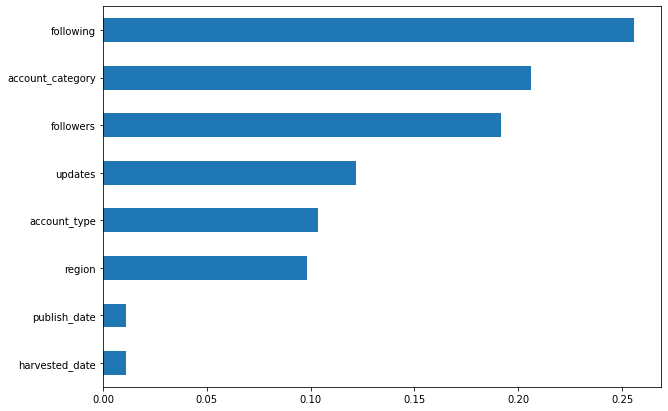

In [11]:
model = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,7))
importances.sort_values().plot.barh();

# **NLP**


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/worldwidekatie/Build_Week_2/master/ira_cleaned_data.csv')
df = df.copy()
df = df[['content', 'target']]
df.head()

,content,target
0,#adee RT davis1988will: Congratulations for Ma...,1.0
1,RT SSOL getting attention. It's penny play day...,1.0
2,#laup SHOCK VIDEO : Antifa Thugs Break a Latin...,1.0
3,PROOF Melania Has Done FAR MORE for Disaster R...,1.0
4,"An USC professor, Raphael Bostic, named first ...",1.0


I'm estimating with a very high estimate that .00005% of tweets are IRA tweets. It's probably less than that.

My sample has 5% IRA tweets, so it's a bit oversampled.

In [33]:
df.target.value_counts(normalize=True)

0.0    0.947465
1.0    0.052535
Name: target, dtype: float64

In [6]:
train, val = train_test_split(df, random_state=42)
print(train.shape, val.shape)

(151984, 2) (50662, 2)


In [7]:
train, test = train_test_split(train, random_state=42)
print(train.shape, test.shape)

(113988, 2) (37996, 2)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import itertools

In [0]:
target = 'target'
features = 'content'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

#The pipeline below is the highest recall I could get 88.9%! Woot!

In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [28]:
pipeline = make_pipeline(
    TfidfVectorizer(),
    SelectPercentile(f_classif, percentile=10),
    PassiveAggressiveClassifier()
)
param_distributions = { 
    #'selectpercentile__percentile':[5,10,30,40,60,90],
    'passiveaggressiveclassifier__class_weight':[{1:0.52808406, 0:19.40184758}, 
                                                 {1:0.52808406, 0:9.40184758},
                                                 'balanced', None],
    'passiveaggressiveclassifier__max_iter':[10,20,30,40,50,60,70,100,200,500,None]
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, #Changed from 10
    cv=5, #Changed from 5
    scoring='recall', 
    verbose=1, 
    return_train_score=True
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: an integer is required

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: an integer is required

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: an integer is required

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit 

In [29]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', -search.best_score_)
pipeline = search.best_estimator_
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Validation Accuracy:", pipeline.score(X_val, y_val))

Best hyperparameters {'passiveaggressiveclassifier__max_iter': 60, 'passiveaggressiveclassifier__class_weight': 'balanced'}
Cross-validation Accuracy -0.8825474303407258
Train Accuracy: 0.9910867810646735
Validation Accuracy: 0.9830050136196755


In [30]:
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8025543665861236
Recall: 0.8894414690130069


# This attempt was the balanced between precision and recall I could get

In [152]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', -search.best_score_)
pipeline = search.best_estimator_
print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Validation Accuracy:", pipeline.score(X_val, y_val))

Best hyperparameters {'selectpercentile__percentile': 90, 'passiveaggressiveclassifier__max_iter': 200, 'passiveaggressiveclassifier__class_weight': 'balanced'}
Cross-validation Accuracy -0.8447707590214917
Train Accuracy: 0.9993683545636383
Validation Accuracy: 0.984860447672812


In [153]:
y_pred = pipeline.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print("Precision:", tp /(tp+fp))  
print("Recall:", tp/(tp+fn))

Precision: 0.8542385884158036
Recall: 0.8519510328997705


#I'm trying to figure out feature importances but I'm not entirely sure what .vocabulary_ does or what this table means or why it's in the order that it is or what the numbers on the right mean.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
#print(vectorizer.get_feature_names())
vectorizer = pipeline.named_steps['tfidfvectorizer']
features = pd.Series(vectorizer.vocabulary_)
features.head(50)

disappointed      30277
with             111164
the              100901
tt               104763
today            103116
ruined            87923
by                19133
hurricane         47743
headwind          45239
doing             31172
make              64417
up               106858
homework          46808
missing           68593
school            89848
all                8157
time             102544
for               38835
acting             6334
is                50520
getting           41331
little            61689
annoying           9981
homeschooling     46800
would            111789
be                13854
so                94360
much              70857
easier            32989
ouvindo           76912
guns              43681
roses             87473
november          74565
rain              83810
new               73017
proposal          82033
takes             99213
care              20075
of                75369
border            16972
wall             109233
funding         